In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Device is {device}")

Device is cuda


In [2]:
transform = transforms.Compose([transforms.ToTensor()])

train = datasets.MNIST(root='./data', train=True, transform = transform, download=True)
test = datasets.MNIST(root='./data', train=False, transform = transform, download=True)

In [3]:
train_loader = torch.utils.data.DataLoader(dataset=train, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test, batch_size=32, shuffle=False)

In [4]:
class MNIST(nn.Module):
    def __init__(self):
        super(MNIST, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 8, 3, stride=1, padding=1),
            nn.MaxPool2d(2 ,stride=2),
            nn.ReLU(),

            nn.Conv2d(8, 16, 3, stride=1, padding=1),
            nn.MaxPool2d(2, stride=2),
            nn.ReLU(),

            nn.Conv2d(16, 32, 3, stride=1, padding=1),
            nn.MaxPool2d(2, stride=2),
            nn.ReLU(),
        )

        self.linear = nn.Sequential(
            nn.Linear(288, 10),
            nn.Sigmoid()
        )
    def forward(self, X):
        out = self.conv(X)
        batch_size = out.shape[0]
        return self.linear(out.view(batch_size, -1))

Epoch......1/5


  0%|          | 0/1875 [00:00<?, ?it/s]

/opt/anaconda3/envs/pytorch_env/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1702400440653/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


Epoch......2/5


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch......3/5


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch......4/5


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch......5/5


  0%|          | 0/1875 [00:00<?, ?it/s]

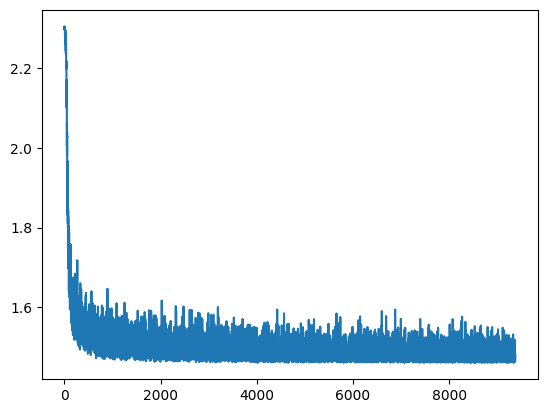

In [5]:
from tqdm.notebook import tqdm
EPOCHS = 5
LEARNING_RATE = 0.001
loss = []

model = MNIST().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

for epoch in range(EPOCHS):
    print(f"Epoch......{epoch+1}/{EPOCHS}")
    for batchID, (inputs, labels) in enumerate(tqdm(train_loader)):
        inputs, labels = inputs.to(device), labels.to(device)

        labels = F.one_hot(labels, num_classes=10).float()

        optimizer.zero_grad()
        out = model(inputs)
        L = criterion(out, labels)

        L.backward()
        optimizer.step()

        loss.append(L.item())

plt.plot(loss)

Accuracy: 0.9842


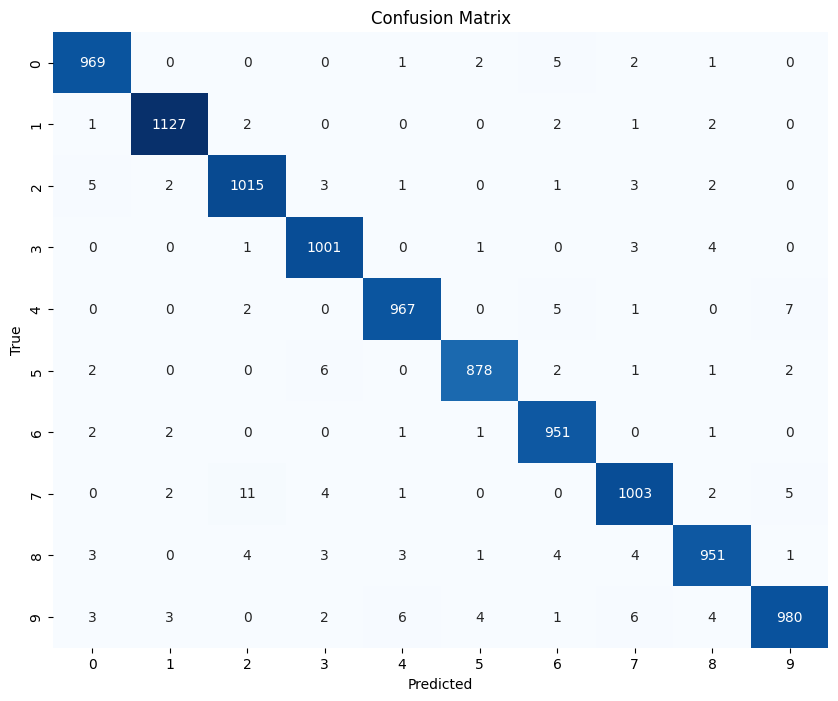

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

model.eval()

y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.4f}')

cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [7]:
print(sum(p.numel() for p in model.parameters()))

8778
